## Max-Margin Classifier

Let's take a look at our iris dataset again:

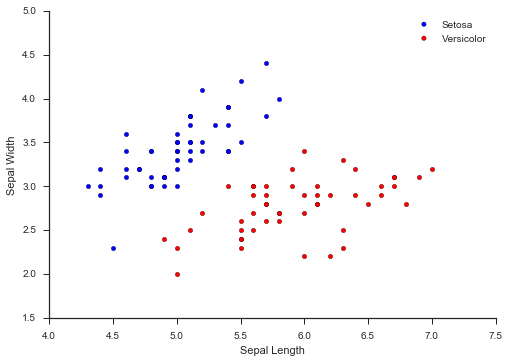

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

Here we have the task of deciding whether a flower is a setosa or a versicolor based on the Sepal width and length. As we can see from this data, it turns out that there is actually a **seperating hyperplane**.

A seperating hyperplane basically means that we can draw a straight line on the above plot and perfectly seperate the two classes. A hyperplane is a subspace whose dimension is one less than the space in which it is located. For example, we have a 2-dimensional space in our plot; thus a hyperplane is 1 dimensional. If we had 50 features, though, our hyperplane would be in 49 dimensional space.

This is great! But what line should we draw? Below I will draw three that perfectly seperate our classes

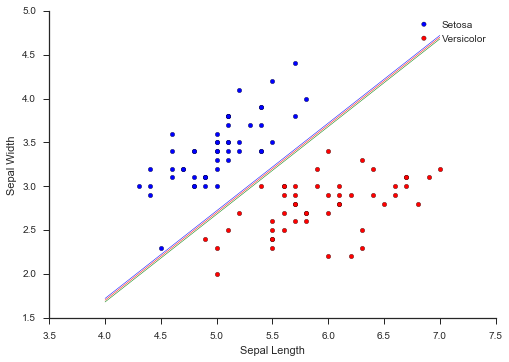

In [2]:
setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
xs = range(4,8)
plt.plot(xs, [-2.3 + x * 1 for x in xs], lw=.5, c='r')
plt.plot(xs, [-2.28 + x * 1 for x in xs], lw=.5, c='b')
plt.plot(xs, [-2.32 + x * 1 for x in xs], lw=.5, c='g')
sns.despine()

This is where the idea of **max-margin** comes in. The max-margin hyperplane is the hyperplane that has the furthest minimum distance to the training observations. This basically represents the mid-line of the largest gap we can find between the classes.

This also means that when choosing a hyper-plane we only care about the data points from each class that are closest to the seperating hyper-plane. These points are called **support vectors** because they support the hyperplane and if they were to change, the hyperplane placement would change as well. None of the other points matter. They could change as much as they want and not affect the hyperplane as long as they don't get closer than the support vectors.

## Soft-margin Classifier

Now this is all nice, but doesn't seem that useful. How many datasets have perfectly linearly seperable classes? Not many - and the ones that do are not that interesting...

Also, the max-margin classifier is very sensitive to outliers. If one of our support points is an outlier from the class, then we would be really overfitting to our data.

So - can we still use this concept if some of our data points fall on the wrong side of a potential hyperplane or we have some outliers? Yes! The trick is finding a balance between a max-margin classifier and limiting the number of margin violations - data points that fall on the wrong side of the hyper-plane. 

To do this we introduce a hyper-parameter: **C**.

A smaller value of C leads to more margin violations but a larger distance between the hyperplane and the support vectors. Inversely, a higher value has less margin violations, but a smaller distance between the hyperplane and support vectors. Reducing C leads to more bias, and increasing it more variance. 

C can be choosen via cross-validation. Also, now only the points that lie between the support vectors and the hyper-plane or are mis-classified affect the placement of the hyperplane.

**Note**: As a quick side-note, it is important to remember that these classifiers are sensitive to the scale of the data, thus standardizing the features is important.

## Non-linear boundaries

As we have seen in previous lectures, one way to deal with non-linearities is to enlarge the feature space. For example, adding polynomial features like $x^2$ or $x^3$. This also works for SVMs. Before running the SVM model, you could do feature expansion and add things like polynomial features. This works because in the higher dimensional space, there actually is a linear decision boundary. But when viewed in the original space, it is no longer linear.

SVMs are a bit unique in the sense that they have a nice trick that we can leverage to efficiently expand our feature space in many different ways. This is called the kernel trick.

### The Kernel Trick

It turns out that to solve the SVM model the only computations required are inner products of the observations. The inner product here for two rows of data is just the sum of the features multiplied by eachother. If we have P features:

$$<x_{i},x_{j}> = \sum_{k=1}^{P}x_{ik}x_{jk}$$

The kernel trick basically says that everytime we see an inner product when solving the SVM, we replace it with a more general form. The form shown above is known as the **linear form**. But we also have a **polynomial form**:

$$K(x_{i},x_{j}) = (1 + \sum_{k=1}^{P}x_{ik}x_{jk})^d$$

In the polynomial form, we have a $d$ parameter which is the degree of polynomial we would like to use. It turns out that this is a much more efficient way of adding polynomial features to an SVM.

Another popular form is the **radial form**:

$$K(x_{i},x_{j}) = exp(-\gamma \sum_{k=1}^{P}(x_{ik} - x_{jk})^2)$$

In this form, we have the $\gamma$ parameter which is > 0. If the two values being compared are very far, we get the exp of a large negative number, which is a very small number. This means that observations far away have a small effect, so this kernel have very local behavior. This is an especially cool kernel because the enlarged feature space is infinite-dimensional, so without the kernel trick, we could never do this!

Note: Choosing a large value for $\gamma$ increases variance and a small value increases bias. You can also try to find the best kernel and parameter values using cross-validation.

### Multi-class

Sklearn handles more than 2 classes with a one-vs-one method. This process takes all the different pairs of labels and trains a seperate classifier for each one. At prediction time, all models are run and then each votes for the class. The highest voted class is choosen. This is pretty computationally expensive as that is $K(K-1)/2$ models where $K$ is the number of classes.

## Regression

The idea of SVM can also be applied to regression problems. For regression problems, you are given a hyper-parameter $\epsilon$ which defines the width around the hyperplane that we will refer to as the margin. The model then tries to find the hyperplane that fits as many of the training points within that margin. There are still the $C$ and kernel hyper-parameters as well and $C$ continues to control the penalty for being outside the margin.

This model is only sensitive to data points which lie outside the and on the margin.

## Sklearn Example

In [3]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
%matplotlib inline

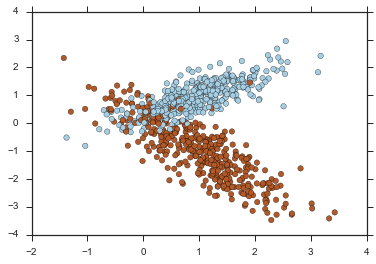

In [4]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, c=y_train, cmap=plt.cm.Paired,
            edgecolors='k')

In [5]:
clf = SVC()
gridsearch = GridSearchCV(clf, {"C": [0.2, 0.5, 0.7], "kernel": ['linear', 'poly', 'rbf'], 
                                'degree': [1, 2, 3], 'gamma': [1, 5, 11]}, scoring='accuracy')
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
print("Test Accuracy: {}".format(accuracy_score(y_test, gridsearch.predict(X_test))))

Best Params: {'gamma': 1, 'kernel': 'rbf', 'C': 0.2, 'degree': 1}
Test Accuracy: 0.935


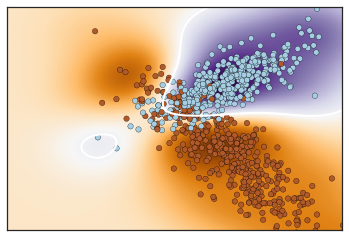

In [6]:
#source: http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
# plot the decision function for each datapoint on the grid
Z = gridsearch.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, c=y_train, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()